# Quesito 2

## Rappresentazione grafica di p(y=+1 | x) in due casi a diversa varianza

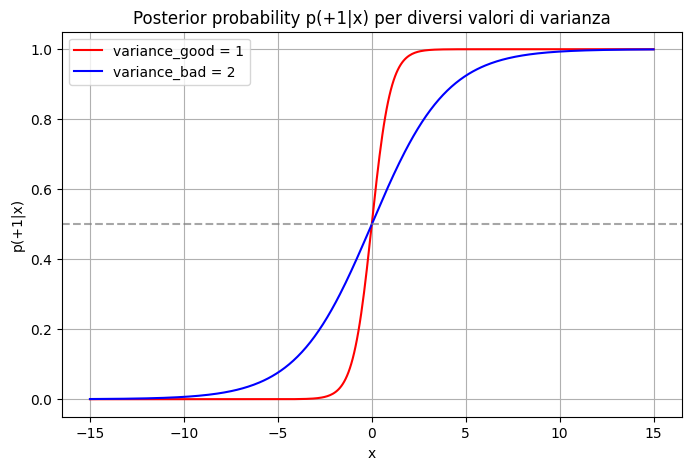

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def posterior_prob(x, variance):
    # p(x|y=-1) con media -1 e varianza variance
    p_x_given_y_minus1 = norm.pdf(x, loc=-1, scale=variance)
    
    # p(x|y=+1) con media 1 e varianza variance
    p_x_given_y_plus1 = norm.pdf(x, loc=1, scale=variance)

    # prior uniformi
    p_y_plus1 = 0.5
    p_y_minus1 = 0.5
    
    # Regola di Bayes per il calcolo di p(y=1|x)
    p_plus1_given_x = (p_x_given_y_plus1 * p_y_plus1) / (
        p_x_given_y_plus1 * p_y_plus1 + p_x_given_y_minus1 * p_y_minus1
    )
    
    return p_plus1_given_x

# range di x per la rappresentazione grafica
gx = np.linspace(-15, 15, 400)

variance_good = 1  # Le realizzazione delle gaussiane sono poco disperse
variance_bad = 2   # Le realizzazione delle gaussiane sono molto disperse

# Calcoliamo p(+1|x) per entrambi i casi
y_good = posterior_prob(gx, variance_good)
y_bad = posterior_prob(gx, variance_bad)

# Creiamo i grafici
plt.figure(figsize=(8,5))
plt.plot(gx, y_good, label=f"variance_good = {variance_good}", color='red')
plt.plot(gx, y_bad, label=f"variance_bad = {variance_bad}", color='blue')
plt.axhline(0.5, color='gray', linestyle='--', alpha=0.7)
plt.xlabel("x")
plt.ylabel("p(+1|x)")
plt.title("Posterior probability p(+1|x) per diversi valori di varianza")
plt.legend()
plt.grid()
plt.show()

### Conclusioni tratte dall'osservazione del grafico

Possiamo interpretare il grafico p(y=1|x) come il grafico che esprime la probabilità che la y sia uguale ad 1 data la specifica osservazione di x della quale si è in possesso.

Ciò che notiamo è che quando la varianza è più alta (grafico blu), e quindi le realizzazioni della gaussiana sono più disperse, è più difficile dire se una certa x appartiene alla classe -1 o alla classe 1, soprattutto quando le realizzazioni di x sono vicine al punto medio tra le due distribuzioni che generano i dati, all'incirca tra x=-1 e x=1.

Infatti per il grafico rosso la probabilità che la y relativa alla x sia 1 passa rapidamente da essere 0 ad essere 1, lasciando quindi un piccolo range di valori della x per i quali c'è incertezza. Invece per il grafico blu c'è un range più alto di valori per i quali non è certa la loro appartenenza alla classe -1 o 1, all'incirca tra x=-5 e x=5.

## Calcolo della probabilità d'errore empirica nel caso variance_good

In [38]:
def calcola_probabilita_errore(soglia, X, Y):
    X = X.flatten()
    
    # Calcolo della previsione sulla base del valore soglia
    previsione = np.where(X >= soglia, 1, -1)  # 1 se X >= soglia, -1 altrimenti
    
    Y = Y.flatten()
    
    # Calcoliamo l'errore come la percentuale di previsioni errate
    errori = (previsione != Y).sum()  # Conta gli errori
    probabilita_errore = errori / len(Y)  # Proporzione di errori rispetto al totale
    
    return probabilita_errore

# dataset
n_montecarlo = 1000

n_samples = 500
p_pos = 0.5           # prior probability of the hypothesis +1
p_neg = 1 - p_pos     # prior probability of the hypothesis -1

n_features = 1

mu_pos = 1                # mean vectors given the two hypotheses
mu_neg = -1
sigma = variance_good

p_err = 0

# Si procede al calcolo della soglia di decisione nel caso di prior equiprobabile secondo la formula studiata
soglia_automatic = (mu_pos + mu_neg)/2
print(f"Soglia automatica: {soglia_automatic}")

# TEST ERROR STIMATO PER MEZZO DI SIMULAZIONI MONTECARLO
for i in range(n_montecarlo):
    y = np.random.choice(np.array([-1,1]), (n_samples,1), p=[p_neg, p_pos])
    X = np.zeros((n_features,n_samples))
    for i in range(n_samples):
        X[:,i] = np.random.normal(mu_pos, sigma) if y[i] == 1 else np.random.normal(mu_neg, sigma)
    p_err = p_err + calcola_probabilita_errore(soglia=soglia_automatic, X=X, Y=y)

errore = p_err / n_montecarlo
print(f"La probabilità d'errore è: {errore:}")

Soglia automatica: 0.0
La probabilità d'errore è: 0.15843000000000004


## Calcolo della probabilità d'errore empirica nel caso variance_bad

In [39]:
def calcola_probabilita_errore(soglia, X, Y):
    X = X.flatten()
    
    # Calcolo della previsione sulla base del valore soglia
    previsione = np.where(X >= soglia, 1, -1)  # 1 se X >= soglia, -1 altrimenti
    
    Y = Y.flatten()
    
    # Calcoliamo l'errore come la percentuale di previsioni errate
    errori = (previsione != Y).sum()  # Conta gli errori
    probabilita_errore = errori / len(Y)  # Proporzione di errori rispetto al totale
    
    return probabilita_errore

# dataset
n_montecarlo = 1000

n_samples = 500
p_pos = 0.5
p_neg = 1 - p_pos

n_features = 1

mu_pos = 1
mu_neg = -1
sigma = variance_bad

p_err = 0

# Si procede al calcolo della soglia di decisione nel caso di prior equiprobabile secondo la formula studiata
soglia_automatic = (mu_pos + mu_neg)/2
print(f"Soglia automatica: {soglia_automatic}")

# TEST ERROR STIMATO PER MEZZO DI SIMULAZIONI MONTECARLO
for i in range(n_montecarlo):
    y = np.random.choice(np.array([-1,1]), (n_samples,1), p=[p_neg, p_pos])
    X = np.zeros((n_features,n_samples))
    for i in range(n_samples):
        X[:,i] = np.random.normal(mu_pos, sigma) if y[i] == 1 else np.random.normal(mu_neg, sigma)
    p_err = p_err + calcola_probabilita_errore(soglia=soglia_automatic, X=X, Y=y)

errore = p_err / n_montecarlo
print(f"La probabilità d'errore è: {errore:}")

Soglia automatica: 0.0
La probabilità d'errore è: 0.3092600000000013


### Conclusioni relative al calcolo dell'errore empirico per mezzo di simulazioni Montecarlo
Notiamo che nel caso di varianza più alta la probabilità d'errore stimata è circa 0.31, nel caso di varianza più bassa la probabilità d'errore stimata è invece circa 0.16 (circa la meta).

Questo risultato risulta in linea con le aspettative, era infatti prevedibile che nel caso in cui le realizzazioni delle due gaussiane sono meno disperse è più facile capire qual è la distribuzione che ha generato i dati, permettendo quindi una classificazione più agevole e con meno errori.